<a href="https://colab.research.google.com/github/gullyboy007/deep-learn/blob/master/linear_regression_in_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()


In [0]:
learning_parameter = 0.01
epoch = 300

In [0]:
sample_points = 50

x_train = np.linspace(0, 30, sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

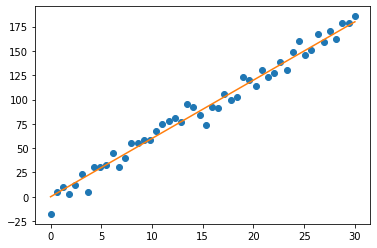

In [10]:
#Noisy dataset
plt.plot(x_train, y_train, 'o')
#Noise free dataset
plt.plot(x_train, 6*x_train)
plt.show()

In [0]:
#Define the TF definitions
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

#Create the mode for regression
pred = X*W + B
#Cost function
cost_iteration = tf.reduce_sum((pred-Y)**2)/(2*sample_points)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#Initialize the variables
init = tf.global_variables_initializer()

In [17]:
#Define the TF session

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epoch):
    for x, y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict= {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict={X : x, Y : y})  
      print("Epoch %f Cost %f Weight %f Bias %f" %(epoch, cost_iter, W1, B1))

  Weight = sess.run(W)
  Bias = sess.run(B)    

Epoch 0.000000 Cost 1.779404 Weight 5.757063 Bias -0.363828
Epoch 40.000000 Cost 0.123608 Weight 6.089280 Bias -0.506701
Epoch 80.000000 Cost 0.122002 Weight 6.095012 Bias -0.655747
Epoch 120.000000 Cost 0.120555 Weight 6.100203 Bias -0.790713
Epoch 160.000000 Cost 0.119255 Weight 6.104903 Bias -0.912928
Epoch 200.000000 Cost 0.118083 Weight 6.109159 Bias -1.023599
Epoch 240.000000 Cost 0.117025 Weight 6.113013 Bias -1.123812
Epoch 280.000000 Cost 0.116072 Weight 6.116503 Bias -1.214558


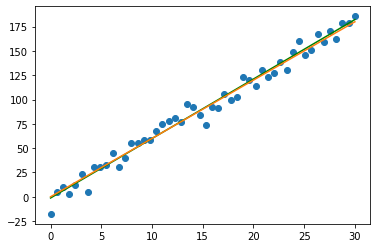

In [21]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train,Weight*x_train+Bias,color = 'Green')
plt.plot(x_train, 6*x_train)
plt.show()